# PARTIEL MAG363 2020-2021 

## Exercice 1.- Implémentation du schéma du point milieu et étude d'un ressort

Une masse ponctuelle $m$ est accrochée au bout d'un ressort de longueur au repos $l$ (et de masse considérée nulle) et ne peut se déplacer que verticalement. On place l'origine du repère au point d'attache du ressort et on définit $y$ égal à moins la hauteur de la masse, de sorte que si le ressort est au repos, $y = l$.
![](ressortFig.png)

Le poids, la force de rappel du ressort et des frottements fluides s'exercent sur la masse $m$ dont le mouvement est alors décrit par l'équation différentielle

$$ \tag{$E_1$}
y^{\prime\prime} (t) = g - \frac{k}{m} (y(t) - l) - Cy^\prime(t)
$$

où $g = 9.80665$ est l'accélération de la pesanteur à la surface de la Terre, $k > 0$ est la constante de raideur du ressort et $C \geq 0$ est le coefficient de frottements.

1. L'équation $(E_1)$ admet une solution constante définie sur $\mathbb{R}$, la calculer (théoriquement). À quoi correspond cette solution physiquement ?

On cherche une solution constante $y_{const}$ défnie sur $\mathbb{R}$, de sorte que $y_{const}^\prime = y_{const}^{\prime\prime} = 0$ et $y_{const}$ solution de $(E_1)$ sur $\mathbb{R}$ équivaut à pour tout $t \in \mathbb{R}$,
$$
g - \frac{k}{m} (y_{const}(t) - l) = 0 \quad \Leftrightarrow \quad y_{const}(t) = \frac{mg}{k} + l \: .
$$
Cela correspond au point où le rappel du ressort équilibre exactement le poids.

2. Implémenter le *schéma du point milieu :*
$$
\begin{cases} 
   t_{n,2} = t_n +\displaystyle\frac{1}{2}h \\
   y_{n,2} = y_n + \displaystyle \frac{1}{2}h f(t_n, y_n)\\
   y_{n+1} = y_n + h f(t_{n,2}, y_{n,2})\\
   t_{n+1} = t_n +h.\\
\end{cases}
$$
On pourra définir une fonction `pointMilieuMultiD` avec
- comme arguments d'entrée : `fun` (second membre de l'EDO), `y0` (condition initiale au temps `t0`), `t0`, `T` (la longueur de l'intervalle, de sorte que $[t_0, t_0+T]$ est l'intervalle sur lequel on cherche à résoudre l'EDO) et `h` (pas de temps).
- qui renvoie une liste `[tps, sol]` où `tps` est le vecteur $[t_0, \ldots, t_N]$ et `sol` est un `numpy ndarray` de taille `(tps.size, y0.size)`

In [1]:
"""
def pointMilieuMultiD(fun, y0, t0, T, h)


    return tps,sol
"""

import numpy as np
import matplotlib.pyplot as plt

def pointMilieuMultiD(fun, y0, t0, T, h):

    """ fun est le second membre de l'equation y' = fun(t,y)
        [t0,t0+T] est l'intervalle de temps sur lequel on resout
        y0 est un numpy array : c'est la condition initiale y(t0)=y0
        h est le pas de temps"""
    """euler renvoie
        * tps un numpy array contenant la discretisation de l'intervalle de temps
        * sol un numpy ndarray de taille (tps.size, y0.size) """
        
    tps = np.arange(t0, t0+T+h, h)
    d = y0.size # 
    N = tps.size
    sol = np.zeros((N, d)) #
    sol[0]=y0
    for i in range(N-1):
        p1 = fun(tps[i],sol[i])
        sol[i+1] = sol[i] + h*fun(tps[i]+0.5*h, sol[i]+0.5*h*p1)
    return [tps, sol]

3. En posant $v = y^\prime$, ramener l'équation différentielle $(E_1)$ d'ordre $2$ à une équation différentielle $(E_2)$ d'ordre $1$ portant sur le vecteur $\displaystyle X = \left( \begin{array}{c}
y \\ 
v
\end{array} \right) \in \mathbb{R}^2$.

On obtient
$$
X^\prime = \left( \begin{array}{c}
y^\prime \\ 
y^{\prime\prime}
\end{array} \right) = \left( \begin{array}{c}
v \\ 
\displaystyle g - \frac{k}{m} (y - l) - Cv
\end{array} \right) \: .
$$
Ainsi $X$ est solution de l'équation différentielle
$$ \tag{$E_2$}
X^\prime = F(X) \quad \text{avec} \quad \left| \begin{array}{lcccl}
F & : & \mathbb{R}^2 & \rightarrow & \mathbb{R}^2 \\
  &   &   (x_1, x_2) & \mapsto     & \displaystyle (x_2, g - \frac{k}{m} (x_1 - l) - C x_2)
\end{array} \right.
$$

*On prendra $l = 2$, $m = 0.5$ et $k = 6$ et dans un premier temps $C = 0$ (on néglige les forces de frottements : questions $4$ à $7$).*

4. En utilisant le schéma du point milieu, résoudre numériquement $(E_2)$ sur un intervalle de temps $[0, 20]$ avec un pas de temps $h = 0.005$. Prendre la condition initiale correspondant à la solution constante trouvée à la question $1$ afin de vérifier que votre implémentation est correcte dans ce cas et représenter $y$ en fonction du temps $t$.

y_const = 2.8172208333333333


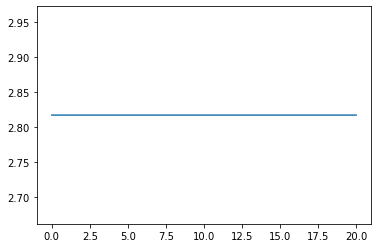

In [8]:
# paramètres système
g = 9.80665
m = 0.5
l = 2
k = 6

# Intervalle de résolution
t0 = 0.
T = 20.
h = 0.005

# Second membre
def ressort(t, u):
    y = u[0]
    vy = u[1]
    return np.array([vy, -k/m*(y-l) +g])

yeq = l + m*g/k # point d'équilibre
print('y_const = '+str(yeq))

u0 = np.array([yeq, 0])
tps, sol = pointMilieuMultiD(ressort, u0, t0, T, h)
y = sol[:,0]

plt.figure()
plt.plot(tps, y)

On retrouve bien numériquement la solution constante trouvée à la question $1$.

5. Choisir deux autres conditions initiales. On représentera sur une première figure $y$ en fonction du temps (pour les trois conditions initiales) et sur une deuxième figure on tracera les orbites associées $\{ (y(t), y^\prime(t)) \, : \, t \in [0,T] \} \subset \mathbb{R}^2$.

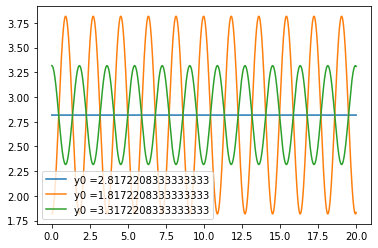

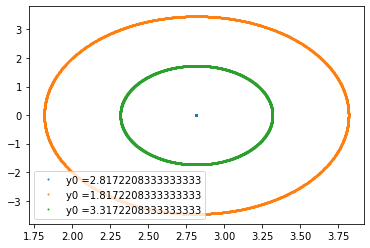

In [3]:
for y0 in [yeq, yeq-0.5*l, yeq+0.25*l]:    
    vy0 = 0.
    u0 = np.array([y0, vy0])
    tps, sol = pointMilieuMultiD(ressort,u0, t0, T, h)
    y = sol[:,0]
    vy = sol[:,1]

    plt.figure(0)
    plt.plot(tps, y, label='y0 ='+str(y0))
    plt.legend()

    plt.figure(1)
    plt.plot(y, vy,'.', markersize =2, label='y0 ='+str(y0))
    plt.legend()


plt.show()

6. On introduit l'énergie mécanique du système $E : \mathbb{R}^2 \rightarrow \mathbb{R}$ définie par

$$
\forall (x_1, x_2) \in \mathbb{R}^2, \quad E(x_1,x_2) = -mg x_1 + \frac{1}{2} m (x_2)^2 + \frac{1}{2} k (x_1 - l)^2 \: .
$$

Montrer (par un calcul théorique) que si $y$ est solution de $(E_1)$ sur $[0,T]$, alors $t \mapsto E(y(t), y^\prime(t))$ est constante sur $[0,T]$.

Notons déjà qu'on a 
$$
\partial_1 E (x_1, x_2) = -mg + k (x_1-l)  \quad \text{et} \quad \partial_2 E (x_1, x_2) = m x_2 \: .
$$
On suppose que $y$ est solution de $(E_1)$ sur $[0,T]$ (avec $C =0$), on a alors pour $t \in [0,T]$,

$$
\dfrac{d}{dt} E (y(t), y^\prime(t)) = y^\prime(t) k (y(t) - l) - mg + y^{\prime\prime}(t) m y^\prime(t) = m y^\prime(t) \left( y^{\prime\prime(t)} + \frac{k}{m} (y(t)-l) - g \right) = 0 \: .
$$
Ainsi $t \mapsto E(y(t), y^\prime(t))$ est constante sur $[0,T]$.

7. Sur une nouvelle figure, représenter l'évolution de l'énergie en fonction du temps pour chacune des trois solutions calculées précédemment, qu'en pensez-vous ?

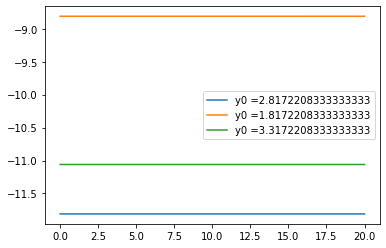

In [4]:
# Energie Mecanique du système

def energie(y, vy):
    return  m*g*(-y) + 0.5*m*vy**2 + 0.5*k*(y-l)**2

for y0 in [yeq, yeq-0.5*l, yeq+0.25*l]:    
    vy0 = 0.
    u0 = np.array([y0, vy0])
    tps, sol = pointMilieuMultiD(ressort,u0, t0, T, h)
    y = sol[:,0]
    vy = sol[:,1]
    
    plt.figure(2)
    plt.plot(tps, energie(y, vy), label='y0 ='+str(y0))
    plt.legend()

8. Reprendre l'étude en introduisant une force de frottements avec par exemple $C = 0.3$ et commentez. Quel changement (qualitatif) observez-vous lorsque vous augmentez le coefficient de frottements $C$ ? Comment pouvez-vous l'expliquer à partir de votre connaissance théorique des solutions de $(E_1)$ ?


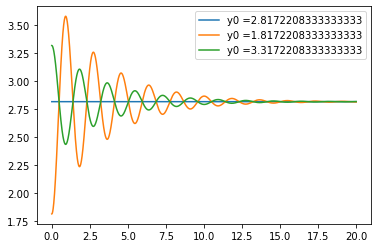

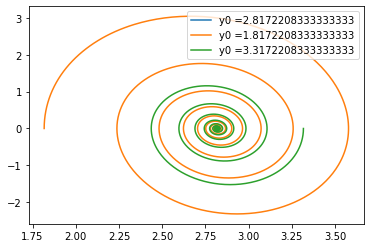

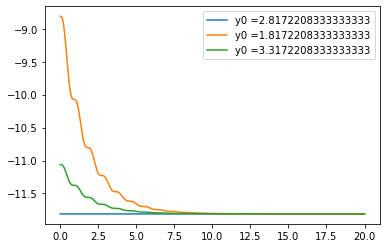

In [5]:
# Ressort amorti

#C = 2.*np.sqrt(k*m) + 0.2 # coefficient de frottement
C = 0.3

# Second membre

def ressortFrott(t, u):
    y = u[0]
    vy = u[1]
    return np.array([vy, -k/m*(y-l) +g - C/m*vy])

for y0 in [yeq, yeq-0.5*l, yeq+0.25*l]:    
    vy0 = 0.
    u0 = np.array([y0, vy0])
    tps, sol = pointMilieuMultiD(ressortFrott, u0, t0, T, h)
    y = sol[:,0]
    vy = sol[:,1]

    plt.figure(3)
    plt.plot(tps, y, label='y0 ='+str(y0))
    plt.legend()

    plt.figure(4)
    plt.plot(y, vy, label='y0 ='+str(y0))
    plt.legend()
    
    plt.figure(5)
    plt.plot(tps, energie(y, vy), label='y0 ='+str(y0))
    plt.legend()


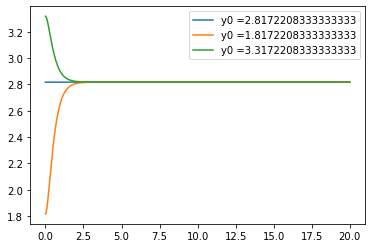

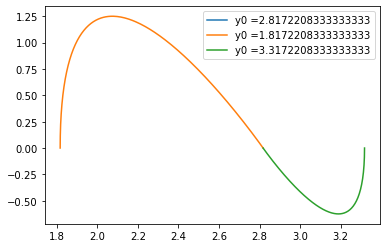

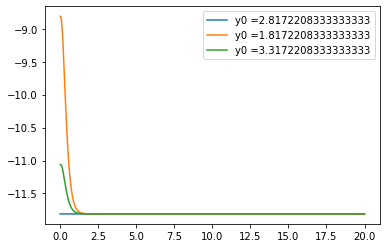

In [6]:
C = 2.*np.sqrt(k/m) + 0.2 # coefficient de frottement

# Second membre

def ressortFrott(t, u):
    y = u[0]
    vy = u[1]
    return np.array([vy, -k/m*(y-l) +g - C*vy])

for y0 in [yeq, yeq-0.5*l, yeq+0.25*l]:    
    vy0 = 0.
    u0 = np.array([y0, vy0])
    tps, sol = pointMilieuMultiD(ressortFrott, u0, t0, T, h)
    y = sol[:,0]
    vy = sol[:,1]

    plt.figure(6)
    plt.plot(tps, y, label='y0 ='+str(y0))
    plt.legend()

    plt.figure(7)
    plt.plot(y, vy, label='y0 ='+str(y0))
    plt.legend()
    
    plt.figure(8)
    plt.plot(tps, energie(y, vy), label='y0 ='+str(y0))
    plt.legend()

L'équation différentielle $(E_1)$ est du second ordre à coefficients contant, on sait calculer la forme générale des solutions de l'équation homogène, qui dépend de l'équation caractéristique associée, ici :
$$
r^2 + Cr + \frac{k}{m} = 0 \: .
$$
Le discriminant $\Delta = \displaystyle C^2 - \frac{4 k}{m}$, pour $C =0.3$, $l = 2$, $k = 6$ et $m = 0.5$, $\Delta = -47.91 < 0$. L'équation caractéristique a deux solutions complexes conjuguées $\displaystyle -\frac{C}{2} \pm i \frac{\sqrt{| \Delta|}}{2}$ de partie réelle $< 0$ et on obtient des solutions oscillantes dont l'amplitude tend vers $0$ quand $t \to +\infty$.

Si maintenant on fait croître $C$, dès que $\displaystyle C > 2\sqrt{\frac{k}{m}}$, $\Delta > 0$ et l'équation caractéristique admet $2$ solutions réelles distinctes $\displaystyle -\frac{C}{2} \pm \frac{\sqrt{| \Delta|}}{2}$, comme $\Delta < C^2$ on vérifie qu'elles sont toutes deux $< 0$ et on obtient des solutions convergeant exponentiellement vers $0$ (sans oscillations multiples).

Afin de retrouver l'ensemble des solutions de $(E_1)$, il suffit d'ajouter une solution particulière, ici $y_{const}$ par exemple, de sorte que dans les deux cas, les solutions ne tendent pas vers $0$ mais vers $\displaystyle \frac{mg}{k} + l$.

On observe effectivement ces $2$ comportements pour les solutions numériques obtenues pour $C = 0.3$ puis $\displaystyle C = 2\sqrt{\frac{k}{m}} + 0.2$

In [7]:
C=0.3
C**2 - 4*k/m

-47.91